# MDANALYSIS
- python package for molecular dynamics data analysis
- easy and custom
- computationally expensive tasks are written in C

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from os import fspath
%matplotlib inline

In [7]:
import MDAnalysis as mda
mda.__version__

'0.19.2'

### optional: latex packages
- if you want to show a notebook to your supervisor
- if you want to write down a couple of equations quickly

In [8]:
#from IPython.display import Latex
#from tabulate import tabulate
#from IPython.display import HTML

In [62]:
Path

pathlib.Path

In [11]:
!tar xvf tmp_tutorial3.tar.gz

tar: Error opening archive: Failed to open 'tmp_tutorial3.tar.gz'


## CREATION OF A UNIVERSE
This is the main object. It stores MD data as numpy arrays, so that we can perform any operation using fast numpy libraries

In [13]:
simdir = Path('./adk_equilibrium/')
PSF = simdir / 'adk4AKE.psf'
eqDCD = simdir / 'adk_dims.dcd'
PDB = simdir / 'adk_open.pdb'

In [14]:
u = mda.Universe(str(PSF), str(eqDCD))

In [15]:
print(u.__doc__)

The MDAnalysis Universe contains all the information describing the system.

    The system always requires a *topology* file --- in the simplest case just
    a list of atoms. This can be a CHARMM/NAMD PSF file or a simple coordinate
    file with atom informations such as XYZ, PDB, Gromacs GRO, or CHARMM
    CRD. See :ref:`Supported topology formats` for what kind of topologies can
    be read.

    A trajectory provides coordinates; the coordinates have to be ordered in
    the same way as the list of atoms in the topology. A trajectory can be a
    single frame such as a PDB, CRD, or GRO file, or it can be a MD trajectory
    (in CHARMM/NAMD/LAMMPS DCD, Gromacs XTC/TRR, or generic XYZ format).  See
    :ref:`Supported coordinate formats` for what can be read as a
    "trajectory".

    As a special case, when the topology is a file that contains atom
    information *and* coordinates (such as XYZ, PDB, GRO or CRD, see
    :ref:`Supported coordinate formats`) then the coordinates ar

In [16]:
u.trajectory.n_frames

98

In [17]:
u.atoms

<AtomGroup with 3341 atoms>

In [18]:
u.atoms.dimensions

array([ 0.,  0.,  0., 90., 90., 90.], dtype=float32)

MDAnalysis is strongly structured. Attributes of MDAnalysis Classes can be accessed by typing <\__dict__> after the object we are interesting in.

In [30]:
u.__dict__

{'_instant_selectors': {'ADK': <Segment ADK>},
 '_kwargs': {},
 '_cache': {},
 'filename': 'adk_equilibrium/adk4AKE.psf',
 '_topology': <MDAnalysis.core.topology.Topology at 0x7f44b9133f60>,
 '_class_bases': {MDAnalysis.core.groups.GroupBase: MDAnalysis.core.groups._TopologyAttrContainer,
  MDAnalysis.core.groups.AtomGroup: MDAnalysis.core.groups._TopologyAttrContainer,
  MDAnalysis.core.groups.ResidueGroup: MDAnalysis.core.groups._TopologyAttrContainer,
  MDAnalysis.core.groups.SegmentGroup: MDAnalysis.core.groups._TopologyAttrContainer,
  MDAnalysis.core.groups.ComponentBase: MDAnalysis.core.groups._TopologyAttrContainer,
  MDAnalysis.core.groups.Atom: MDAnalysis.core.groups._TopologyAttrContainer,
  MDAnalysis.core.groups.Residue: MDAnalysis.core.groups._TopologyAttrContainer,
  MDAnalysis.core.groups.Segment: MDAnalysis.core.groups._TopologyAttrContainer},
 '_classes': {MDAnalysis.core.groups.AtomGroup: MDAnalysis.core.groups.AtomGroup,
  MDAnalysis.core.groups.ResidueGroup: MDAnal

## SELECTION
- same format of VMD selection commands
- atom selections are different objects, **AtomGroup**

In [19]:
alanines = u.select_atoms('resname ALA')

In [20]:
alanines.resids

array([  8,   8,   8,   8,   8,   8,   8,   8,   8,   8,  11,  11,  11,
        11,  11,  11,  11,  11,  11,  11,  17,  17,  17,  17,  17,  17,
        17,  17,  17,  17,  37,  37,  37,  37,  37,  37,  37,  37,  37,
        37,  38,  38,  38,  38,  38,  38,  38,  38,  38,  38,  49,  49,
        49,  49,  49,  49,  49,  49,  49,  49,  55,  55,  55,  55,  55,
        55,  55,  55,  55,  55,  66,  66,  66,  66,  66,  66,  66,  66,
        66,  66,  73,  73,  73,  73,  73,  73,  73,  73,  73,  73,  93,
        93,  93,  93,  93,  93,  93,  93,  93,  93,  95,  95,  95,  95,
        95,  95,  95,  95,  95,  95,  99,  99,  99,  99,  99,  99,  99,
        99,  99,  99, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,
       176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 186, 186, 186,
       186, 186, 186, 186, 186, 186, 186, 188, 188, 188, 188, 188, 188,
       188, 188, 188, 188, 194, 194, 194, 194, 194, 194, 194, 194, 194,
       194, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 20

In [21]:
np.unique(alanines.resids)

array([  8,  11,  17,  37,  38,  49,  55,  66,  73,  93,  95,  99, 127,
       176, 186, 188, 194, 203, 207])

In [22]:
alanines.residues

<ResidueGroup with 19 residues>

### many types of selection commands (as usual)
+ using wildcards
+ using types
+ using index
+ etc.

In [23]:
carbons = u.select_atoms('name C*')
carbons.names

array(['CA', 'CB', 'CG', ..., 'C', 'C', 'CA'], dtype=object)

In [24]:
carbons[:10].names

array(['CA', 'CB', 'CG', 'CE', 'C', 'CA', 'CB', 'CG', 'CD', 'CZ'],
      dtype=object)

## CALCULATIONS
 - RMSD: deviations of a subset of the atoms of the structure between two different frames of the trajectory
 - useful measure of structure similarity

In [25]:
from MDAnalysis.analysis.rms import rmsd

In [26]:
np.shape(u.select_atoms("name CA").positions)

(214, 3)

In [27]:
ref = mda.Universe(str(PSF), str(PDB))

In [28]:
rmsd(u.select_atoms('name CA').positions, ref.select_atoms('name CA').positions)

28.204258162856345

In [29]:
rmsd_WRONG = [rmsd(u.select_atoms('name CA').positions, ref.select_atoms('name CA').positions) for ts in u.trajectory[:]]

In [30]:
import seaborn as sns

In [31]:
plt.plot(rmsd_WRONG)
plt.xlabel('time')
plt.ylabel('RMSD')
plt.title('Wrong RMSD')

Text(0.5, 1.0, 'Wrong RMSD')

### let's remove translations and rotations


In [32]:
rmsd_TRUE = [rmsd(u.select_atoms('name CA').positions, ref.select_atoms('name CA').positions, center=True, superposition=True) for ts in u.trajectory[:]]

Text(0.5, 1.0, 'True RMSD')

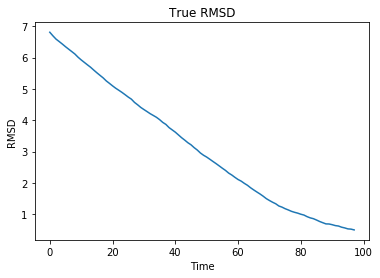

In [33]:
plt.plot(rmsd_TRUE)
plt.xlabel('Time')
plt.ylabel('RMSD')
plt.title('True RMSD')

# overall map of rmsd between structures
#### use with care, it may be computationally expensive

- let's copy the Universe
we want a **NEW** object equal to universe u, not a **NEW VARIABLE** that points to the same object

In [37]:
u_new = u.copy()

- sometimes it may be useful to reduce the size of samples to avoid computational problems (if you have many timesteps)
- this is not the case, but let's see how to perform this reduction quickly

In [60]:
reduced_index = list(range(0,u.trajectory.n_frames,2)) # try to change this number
print(reduced_index)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96]


In [61]:
rmsd_map = [rmsd(u.select_atoms('name CA').positions, u_new.select_atoms('name CA').positions, center=True, superposition=True) for ts in u.trajectory[reduced_index] for ts_one in u_new.trajectory[reduced_index]]

- let's draw a fancy plot

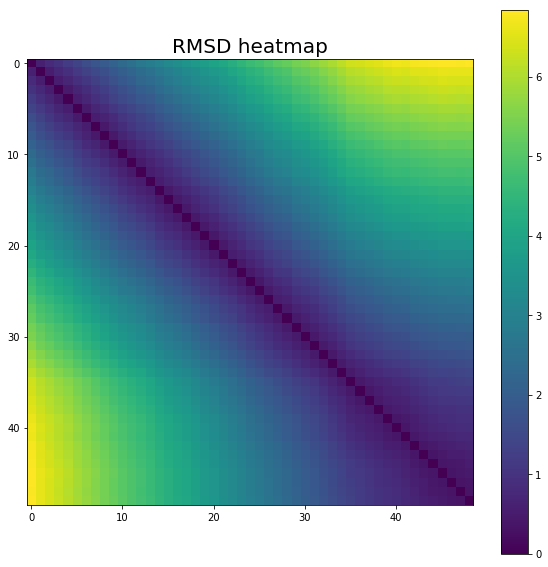

In [46]:
#print(rmsd_map)
rmsd_map = np.array(rmsd_map).reshape((len(reduced_index),len(reduced_index)))
plt.figure(figsize=((10,10)))
plt.title("RMSD heatmap", fontsize=20)
img = plt.imshow(rmsd_map)
plt.colorbar(img);

## RMSF
- measures the fluctuations of each atom with respect to the equlibrium
- proportional to the temperature ($\beta$) factor
- useful to match experimental results


$$RMSF_i = \left[\frac{1}{T}\sum_{t_j=1}^T |\mathbf{r}_i(t_j)-\mathbf{r}_i|^2\right]^{1/2}$$

Usually the reference is identified with the average position over the trajectory

In [47]:
from MDAnalysis.analysis.rms import RMSF

In [48]:
ca_atoms = u.select_atoms("protein and name CA")
myRMSF = RMSF(ca_atoms).run()

In [49]:
plt.plot(myRMSF.rmsf)

## **EXERCISE**
- does the previous plot look reasonable?
- try to compare it to the "*real*" distribution of experimentally observed temperature factors
- *Hint*: you can access the actual $\beta$ factors from a universe: *Universe._topology.tempfactors*

In [56]:
#SOLUTION:
print("TODO: implement me!")

TODO: implement me!


## CONTACT MAP
- C_IJ = 1 if d_ij < cutoff
- measures the closeness of residues

In [52]:
from MDAnalysis.lib import distances

In [53]:
Ca = ref.select_atoms('name CA')
d_CaCa = distances.distance_array(Ca.positions, Ca.positions)

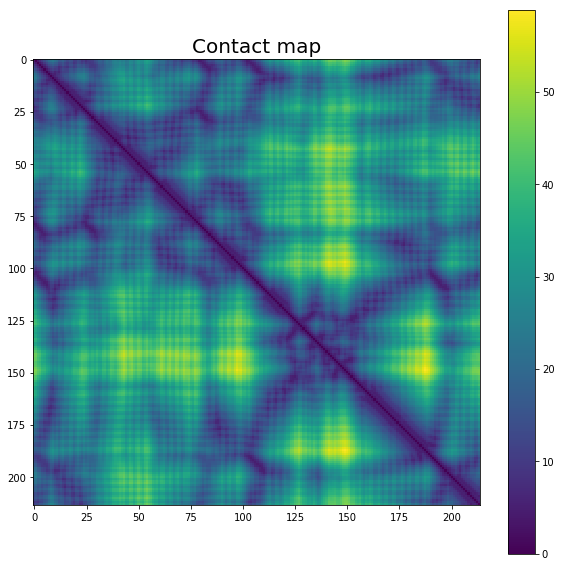

In [54]:
#fig, ax = plt.subplots()
plt.figure(figsize=((10,10)))
plt.title("Contact map", fontsize=20)
img = plt.imshow(d_CaCa)
plt.colorbar(img);